# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Your code here
data = pd.read_csv(r'/Users/edgartome_1/IronHack/IronLabs/Module3/Lab11/boston_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,404.0,3.730912,8.943922,0.00632,0.082382,0.253715,4.053158,88.9762
zn,404.0,10.509901,22.053733,0.00000,0.000000,0.000000,12.500000,95.0000
indus,404.0,11.189901,6.814909,0.46000,5.190000,9.795000,18.100000,27.7400
chas,404.0,0.069307,0.254290,0.00000,0.000000,0.000000,0.000000,1.0000
nox,404.0,0.556710,0.117321,0.39200,0.453000,0.538000,0.631000,0.8710
rm,404.0,6.301450,0.675830,3.56100,5.902750,6.230500,6.629250,8.7800
age,404.0,68.601733,28.066143,2.90000,45.800000,76.600000,94.150000,100.0000
dis,404.0,3.799666,2.109916,1.16910,2.087875,3.207450,5.222125,12.1265
rad,404.0,9.836634,8.834741,1.00000,4.000000,5.000000,24.000000,24.0000
tax,404.0,411.688119,171.073553,187.00000,281.000000,330.000000,666.000000,711.0000


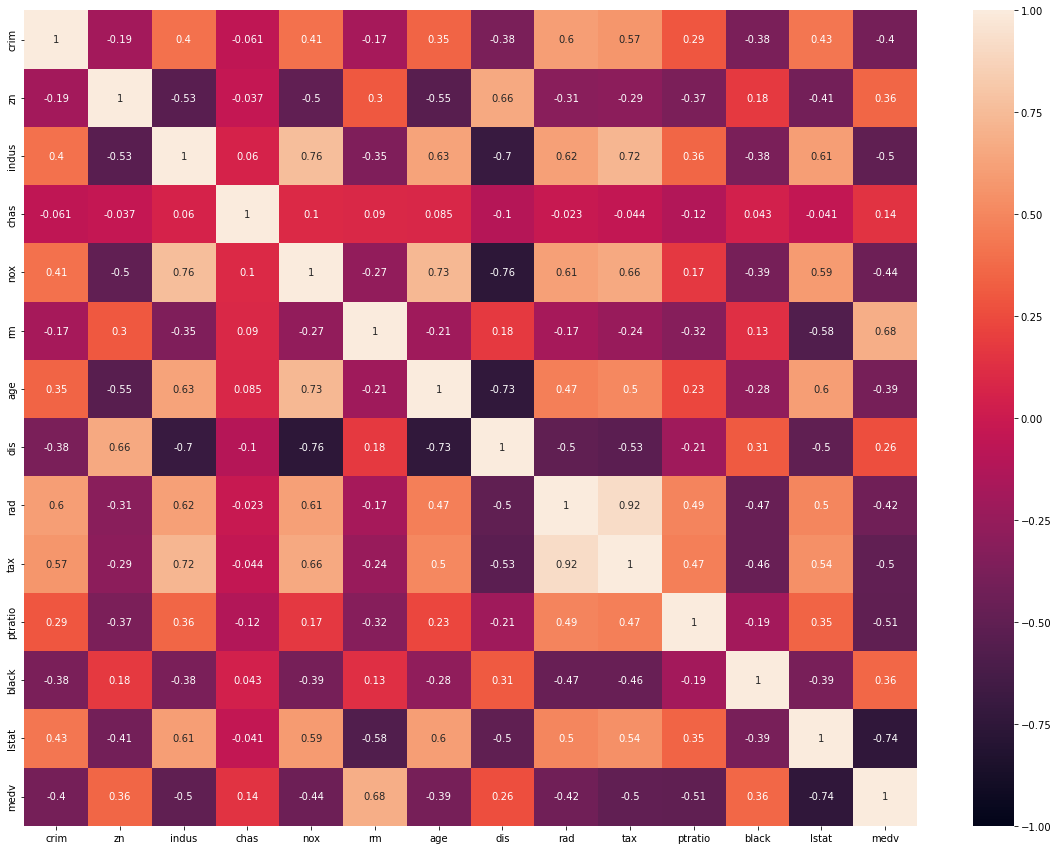

In [5]:
# Column collinearity - any high correlations?

plt.figure(figsize=(20, 15))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

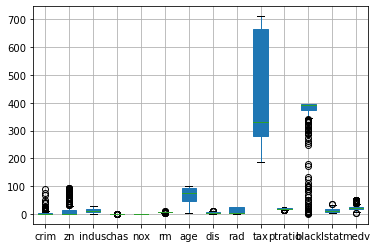

In [6]:
# Descriptive statistics - any outliers to remove?
import matplotlib.pyplot as plt

figsize=(20, 10)

data.boxplot(widths = 0.6, patch_artist = True)

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

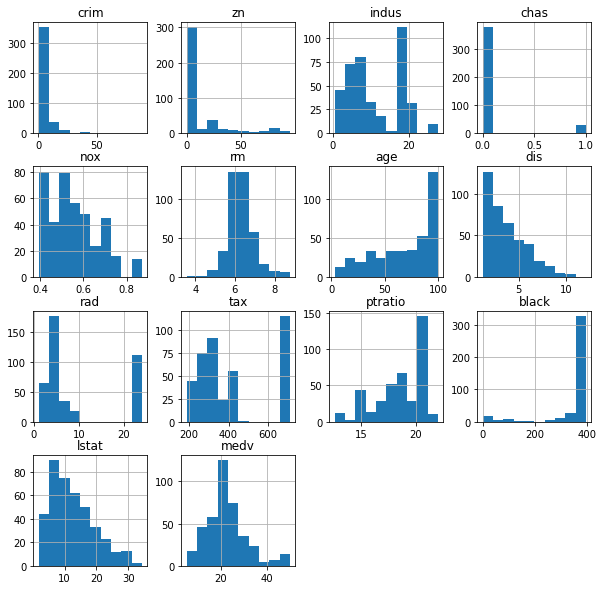

In [7]:
data.hist(figsize=(10,10))

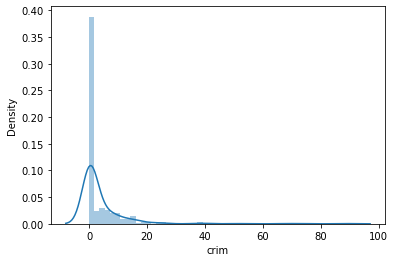

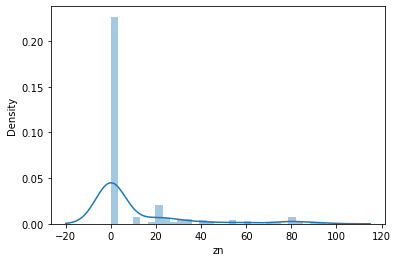

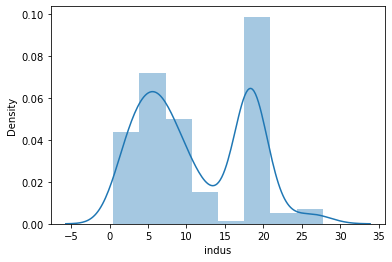

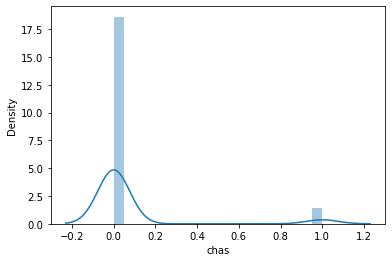

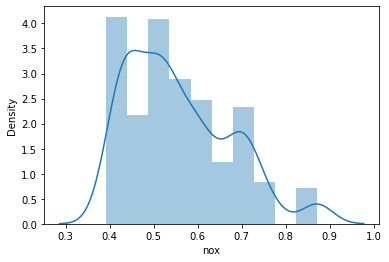

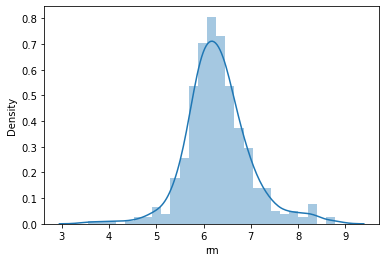

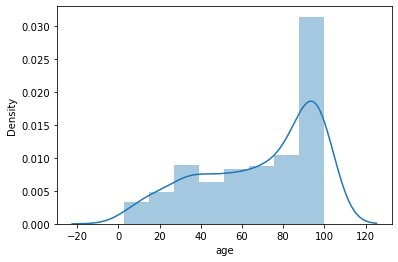

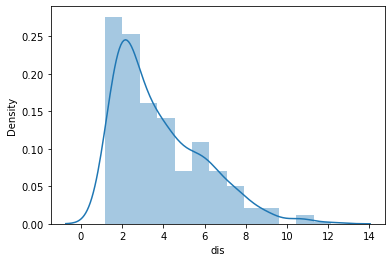

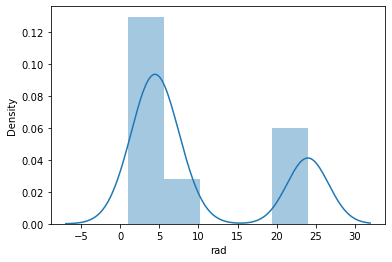

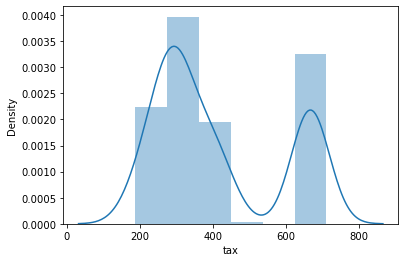

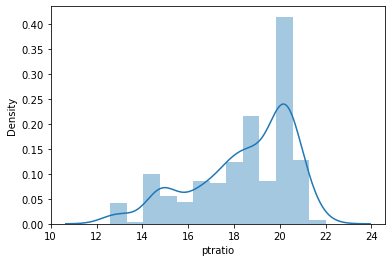

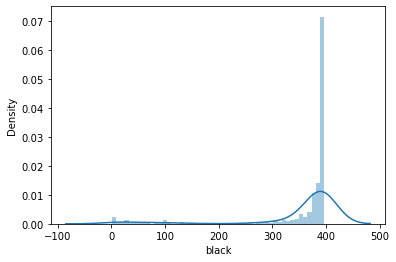

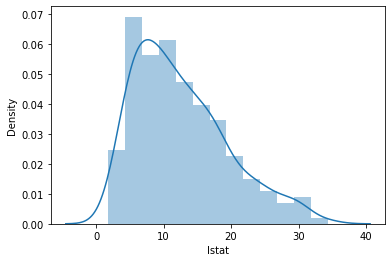

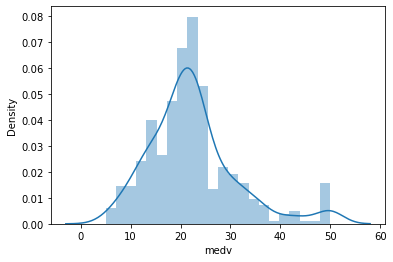

In [8]:
for col in data.columns:
    sns.distplot(data[col],hist=True)
    plt.xlabel(col)
    plt.show()

In [9]:
#Quantitie of outliers
numcol = list(data.describe().columns)

for x in numcol:
    Q3 = data[x].quantile(0.75)
    Q1= data[x].quantile(0.25)
    IQR = Q3 - Q1
    filters = data[data[x]>Q3 + 1.5*IQR]
    print('Column', x)
    print('Number of outliers', len(filters))
    print('Percentage of outliers', "{:.1f}".format((len(filters)/len(data[x]))*100))
    print('\n')

Column crim
Number of outliers 42
Percentage of outliers 10.4


Column zn
Number of outliers 49
Percentage of outliers 12.1


Column indus
Number of outliers 0
Percentage of outliers 0.0


Column chas
Number of outliers 28
Percentage of outliers 6.9


Column nox
Number of outliers 0
Percentage of outliers 0.0


Column rm
Number of outliers 15
Percentage of outliers 3.7


Column age
Number of outliers 0
Percentage of outliers 0.0


Column dis
Number of outliers 5
Percentage of outliers 1.2


Column rad
Number of outliers 0
Percentage of outliers 0.0


Column tax
Number of outliers 0
Percentage of outliers 0.0


Column ptratio
Number of outliers 0
Percentage of outliers 0.0


Column black
Number of outliers 0
Percentage of outliers 0.0


Column lstat
Number of outliers 2
Percentage of outliers 0.5


Column medv
Number of outliers 25
Percentage of outliers 6.2




In [10]:
#Not cutting the outliers because of the high percentage of data to be lost

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

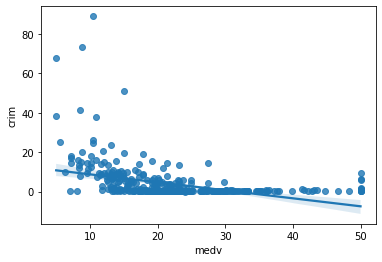

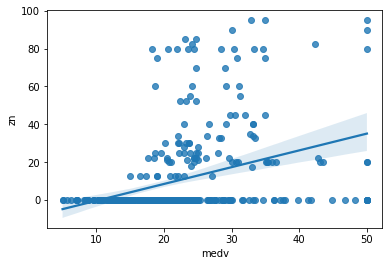

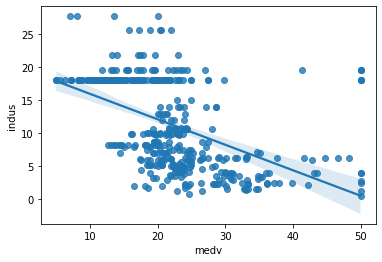

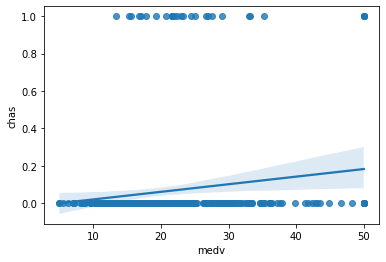

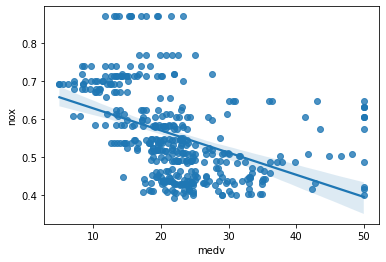

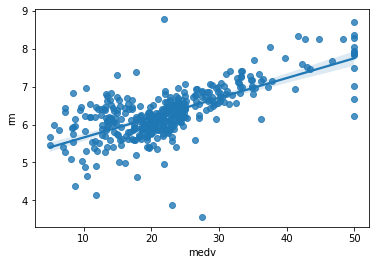

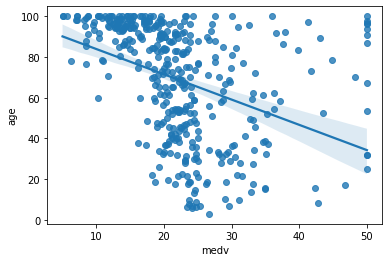

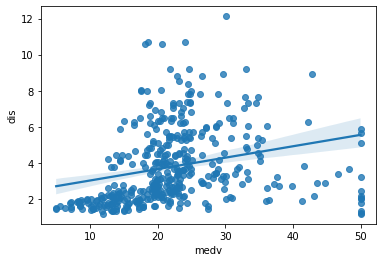

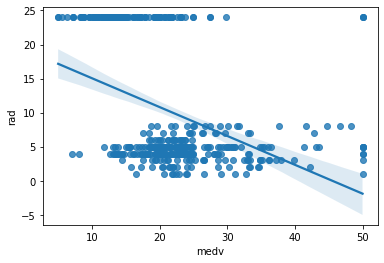

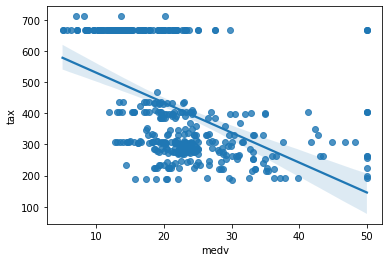

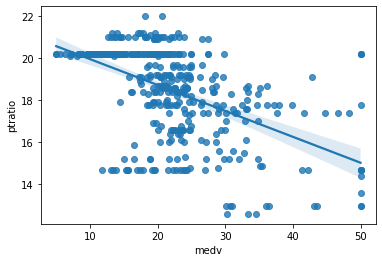

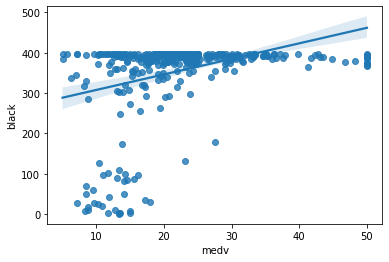

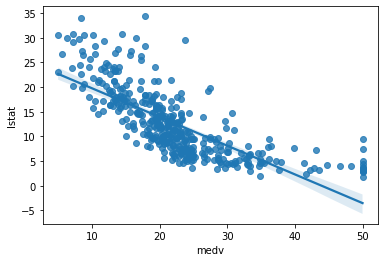

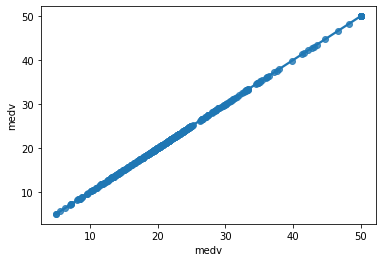

In [11]:
# Your plots here

#columns = ['zn', 'chas', 'rm', 'dis','black']

for col in data.columns:
    sns.regplot(x='medv', y=col, data=data)
    plt.show()

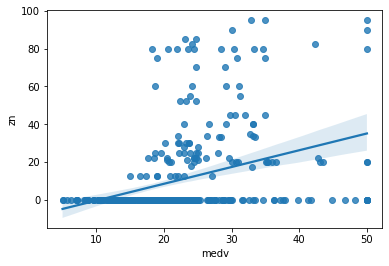

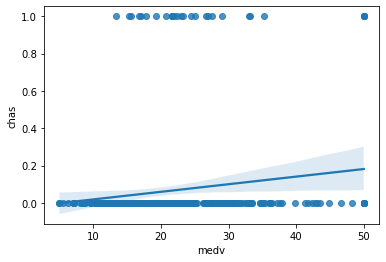

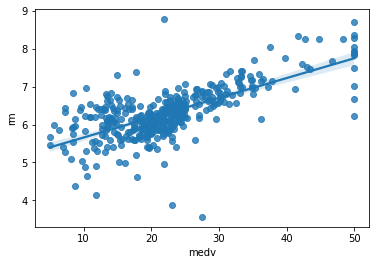

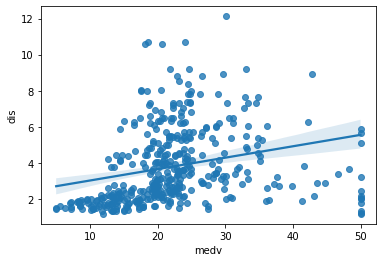

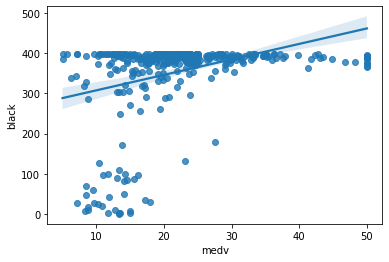

In [12]:
#For the moore significante 
columns = ['zn', 'chas', 'rm', 'dis','black']

for col in columns:
    sns.regplot(x='medv', y=col, data=data)
    plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [13]:
# Your response here
#Positive correlation between rm, dis and the price, 
#If the price increases then the values of rm and dis increase as well

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

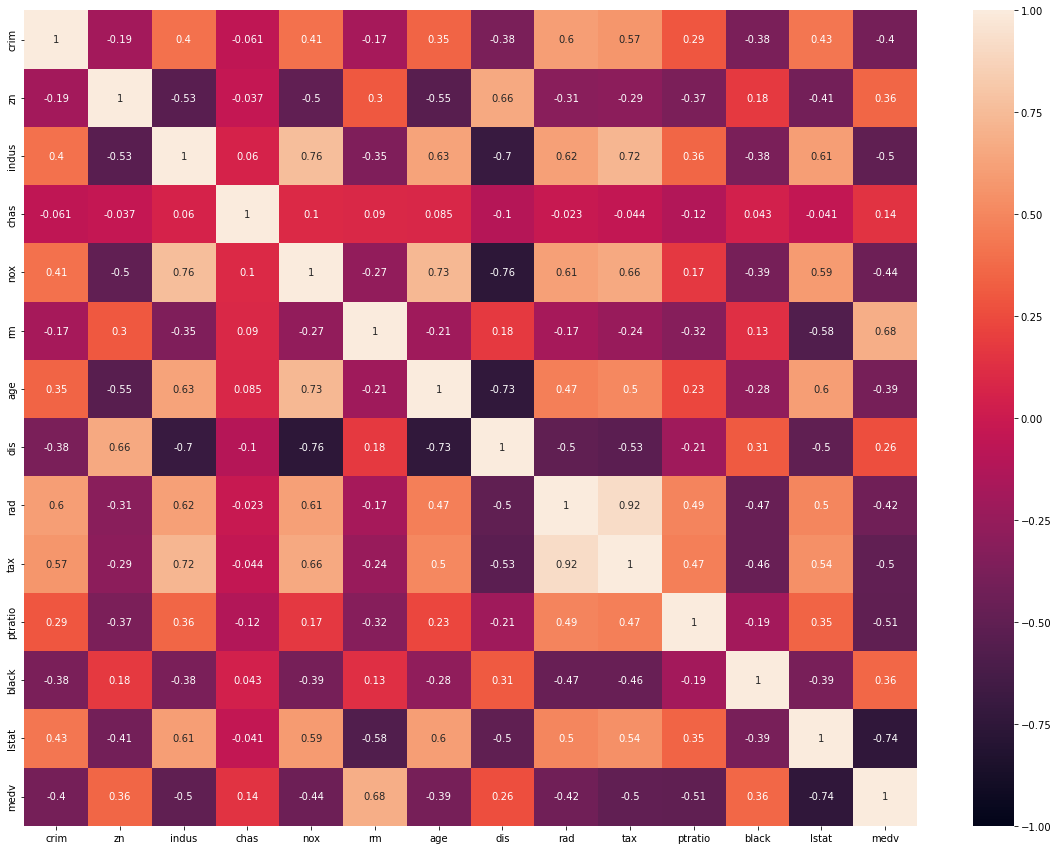

In [14]:

plt.figure(figsize=(20, 15))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [15]:
# Your response here
#Higt correlation betewen the tax and rad

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [16]:
# Your code here
data['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [17]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = r2_score(y_true, y_predict)
    return result

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [18]:
# Your code here

from sklearn.model_selection import train_test_split

y = data['medv']

x = data.drop(labels='medv', axis=1)

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state = 15)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [19]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

max_depth = [2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
    rfr = RandomForestRegressor(max_depth=num)
    rfr.fit(x_train, y_train)
    key = 'rfr_max_depth' + str(num)
    y_predictions_train[key]= rfr.predict(x_train)
    y_predictions_test[key]= rfr.predict(x_test)



Now, plot the score for each tree on the training set and on the testing set.

In [20]:
# Produce a plot with the score for the testing and training for the different max depths

trains_scores = []
for key in y_predictions_train:
    trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
    test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))

In [21]:
df_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)

<AxesSubplot:>

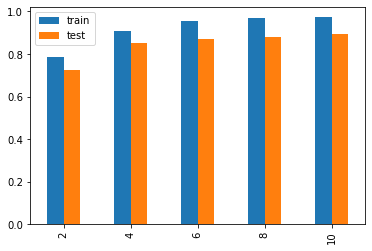

In [22]:
df_score.plot.bar()

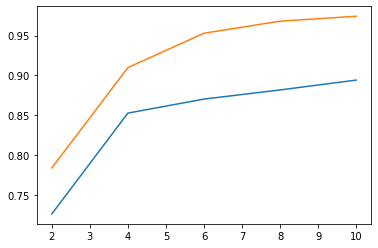

In [23]:
plt.plot(max_depth,test_scores)
plt.plot(max_depth,trains_scores)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [24]:
# Your response here
#For the max_depth of 8, we have the best result of r2 score

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

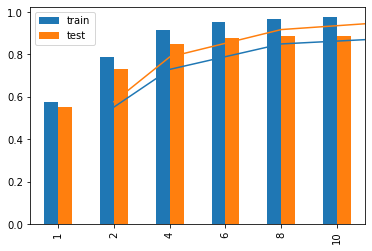

In [25]:
# Your response here
#https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/
#Explained Variance Score

from sklearn.metrics import explained_variance_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = explained_variance_score(y_true, y_predict)
    return result

from sklearn.ensemble import RandomForestRegressor

max_depth = [1,2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
    rfr = RandomForestRegressor(max_depth=num)
    rfr.fit(x_train, y_train)
    key = 'rfr_max_depth' + str(num)
    y_predictions_train[key]= rfr.predict(x_train)
    y_predictions_test[key]= rfr.predict(x_test)
    
trains_scores_2 = []
for key in y_predictions_train:
    trains_scores_2.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores_2 = []
for key in y_predictions_test:
    test_scores_2.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))    

df_score = pd.DataFrame({'train': trains_scores_2, 'test': test_scores_2}, index=max_depth)

df_score.plot.bar()

plt.plot(max_depth,test_scores_2)
plt.plot(max_depth,trains_scores_2)


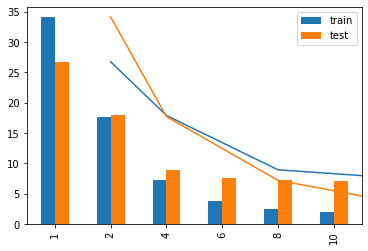

In [26]:
# Your response here

#Mean Squared Error

from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = mean_squared_error(y_true, y_predict)
    return result

from sklearn.ensemble import RandomForestRegressor

max_depth = [1,2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
    rfr = RandomForestRegressor(max_depth=num)
    rfr.fit(x_train, y_train)
    key = 'rfr_max_depth' + str(num)
    y_predictions_train[key]= rfr.predict(x_train)
    y_predictions_test[key]= rfr.predict(x_test)
    
trains_scores_3 = []
for key in y_predictions_train:
    trains_scores_3.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores_3 = []
for key in y_predictions_test:
    test_scores_3.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))    

df_score = pd.DataFrame({'train': trains_scores_3, 'test': test_scores_3}, index=max_depth)

df_score.plot.bar()

plt.plot(max_depth,test_scores_3)
plt.plot(max_depth,trains_scores_3)

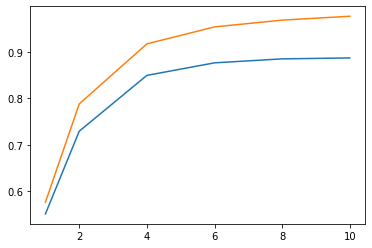

In [27]:
plt.plot(max_depth,test_scores_2)
plt.plot(max_depth,trains_scores_2)



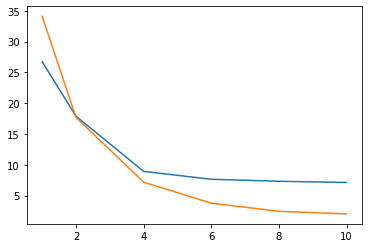

In [28]:
plt.plot(max_depth,test_scores_3)
plt.plot(max_depth,trains_scores_3)

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [29]:
# Your response here
#By the score and the poitn of inflection of the two test the number 4 is the best max_depth

<AxesSubplot:>

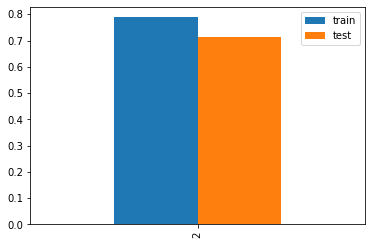

In [30]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = r2_score(y_true, y_predict)
    return result

from sklearn.ensemble import RandomForestRegressor

max_depth = [2]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
    rfr = RandomForestRegressor(max_depth=num)
    rfr.fit(x_train, y_train)
    key = 'rfr_max_depth' + str(num)
    y_predictions_train[key]= rfr.predict(x_train)
    y_predictions_test[key]= rfr.predict(x_test)

trains_scores_4 = []
for key in y_predictions_train:
    trains_scores_4.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores_4 = []
for key in y_predictions_test:
    test_scores_4.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))
    
df_score = pd.DataFrame({'train': trains_scores_4, 'test': test_scores_4}, index=max_depth)

df_score.plot.bar()


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [31]:
# Your response here
#The values from almost 50 years ago is not very relevant as a lot of parmetrs changed including market prices of houses. 
#Nevertheless there are some parametres/features that still will influence house prices now, for example number of rooms.
#With the correct parameters model can be robust, but it is applicable only to urban cities. 
#The house prices in rural cities are probably influenced by other factors than prices in urban cities.
